In [ ]:
!pwd

/content


In [ ]:
import pandas as pd
data=pd.read_csv("./2013-2015-new-york-state-mathematics-exam-by-school-1.csv")
data=pd.DataFrame(data)
data.head()
data.drop("DBN",axis=1)

,School Name,Grade,Year,Category,Number Tested,Mean Scale Score,# Level 1,% Level 1,# Level 2,% Level 2,# Level 3,% Level 3,# Level 4,% Level 4,# Level 3+4,% Level 3+4
0,P.S. 015 ROBERTO CLEMENTE,3,2013,All Students,27,278,16,59.3,11,40.7,0,0,0,0,0,0
1,P.S. 015 ROBERTO CLEMENTE,3,2014,All Students,18,286,6,33.3,9,50,2,11.1,1,5.6,3,16.7
2,P.S. 015 ROBERTO CLEMENTE,3,2015,All Students,17,280,10,58.8,4,23.5,2,11.8,1,5.9,3,17.6
3,P.S. 015 ROBERTO CLEMENTE,4,2013,All Students,20,277,12,60,6,30,1,5,1,5,2,10
4,P.S. 015 ROBERTO CLEMENTE,4,2014,All Students,24,282,9,37.5,14,58.3,1,4.2,0,0,1,4.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161398,EVERGREEN MIDDLE SCHOOL FOR URBAN EXPLORATION,All Grades,2013,SWD,34,250,30,88.2,4,11.8,0,0,0,0,0,0
161399,EVERGREEN MIDDLE SCHOOL FOR URBAN EXPLORATION,All Grades,2014,Not SWD,187,272,126,67.4,57,30.5,4,2.1,0,0,4,2.1
161400,EVERGREEN MIDDLE SCHOOL FOR URBAN EXPLORATION,All Grades,2014,SWD,44,257,36,81.8,8,18.2,0,0,0,0,0,0
161401,EVERGREEN MIDDLE SCHOOL FOR URBAN EXPLORATION,All Grades,2015,Not SWD,264,271,195,73.9,64,24.2,4,1.5,1,0.4,5,1.9


In [ ]:
# numerical = [var for var in data.columns if data[var].dtype =='O']
# print(numerical)
numerical=["# Level 1","# Level 2","# Level 3","% Level 3","Mean Scale Score","Year","Grade"]
# numeric
data[numerical].isnull().sum()
# cat_columns = data.select_dtypes(['category']).columns
# print(cat_columns)
# data[numerical].replace(["s"],[0],inplace=True)
data["# Level 1"].replace(["s"],[0],inplace=True)
data["# Level 2"].replace(["s"],[0],inplace=True)
data["# Level 3"].replace(["s"],[0],inplace=True)
data["% Level 3"].replace(["s"],[0],inplace=True)
data["Mean Scale Score"].replace(["s"],[0],inplace=True)
data["Year"].replace(["s"],[0],inplace=True)
data["Grade"].replace(["s","All Grades"],[0,1],inplace=True)
data[numerical]=data[numerical].astype(float).astype(int)
data.head()

,DBN,School Name,Grade,Year,Category,Number Tested,Mean Scale Score,# Level 1,% Level 1,# Level 2,% Level 2,# Level 3,% Level 3,# Level 4,% Level 4,# Level 3+4,% Level 3+4
0,01M015,P.S. 015 ROBERTO CLEMENTE,3,2013,All Students,27,278,16,59.3,11,40.7,0,0,0,0,0,0
1,01M015,P.S. 015 ROBERTO CLEMENTE,3,2014,All Students,18,286,6,33.3,9,50,2,11,1,5.6,3,16.7
2,01M015,P.S. 015 ROBERTO CLEMENTE,3,2015,All Students,17,280,10,58.8,4,23.5,2,11,1,5.9,3,17.6
3,01M015,P.S. 015 ROBERTO CLEMENTE,4,2013,All Students,20,277,12,60,6,30,1,5,1,5,2,10
4,01M015,P.S. 015 ROBERTO CLEMENTE,4,2014,All Students,24,282,9,37.5,14,58.3,1,4,0,0,1,4.2


In [ ]:
avg=data["# Level 1"]
# avg=[i for i in data["# Level 1"]]
print(avg)
# avg = [int(i) for i in avg]
avg2=data["# Level 2"]
print(avg2)
# avg2 = [int(float(i)) for i in avg2]
avg3=data["# Level 3"]
# avg3 = [int(float(i)) for i in avg3]
avg4=data["% Level 3"]
# avg4 = [int(float(i)) for i in avg4]
zz=zip(avg,avg2,avg3,avg4)
final_avg=[round(sum(i)/4) for i in zz]
data["avg"]=final_avg
numerical.append("avg")
grade_target=[]
for i in final_avg:
  if i>=0 and i<10:
    grade_target.append(0)
  elif i>=10 and i<14:
    grade_target.append(1)
  elif i>=14 and i<18:
    grade_target.append(2)
  else:
    grade_target.append(3)
data["target"]=grade_target
data.head()


0          16
1           6
2          10
3          12
4           9
         ... 
161398     30
161399    126
161400     36
161401    195
161402     54
Name: # Level 1, Length: 161403, dtype: int64
0         11
1          9
2          4
3          6
4         14
          ..
161398     4
161399    57
161400     8
161401    64
161402     6
Name: # Level 2, Length: 161403, dtype: int64


,DBN,School Name,Grade,Year,Category,Number Tested,Mean Scale Score,# Level 1,% Level 1,# Level 2,% Level 2,# Level 3,% Level 3,# Level 4,% Level 4,# Level 3+4,% Level 3+4,avg,target
0,01M015,P.S. 015 ROBERTO CLEMENTE,3,2013,All Students,27,278,16,59.3,11,40.7,0,0,0,0,0,0,7,0
1,01M015,P.S. 015 ROBERTO CLEMENTE,3,2014,All Students,18,286,6,33.3,9,50,2,11,1,5.6,3,16.7,7,0
2,01M015,P.S. 015 ROBERTO CLEMENTE,3,2015,All Students,17,280,10,58.8,4,23.5,2,11,1,5.9,3,17.6,7,0
3,01M015,P.S. 015 ROBERTO CLEMENTE,4,2013,All Students,20,277,12,60,6,30,1,5,1,5,2,10,6,0
4,01M015,P.S. 015 ROBERTO CLEMENTE,4,2014,All Students,24,282,9,37.5,14,58.3,1,4,0,0,1,4.2,7,0


In [ ]:
"""
Algorithm
Ca Divide Sa into 4 groups using XP data via a k-means.
2: if Size of a Cluster in Ca <= 2 then
3: Ca Divide Sa into 3 groups using XP and a k-means.
4: Return C
"""
from sklearn.cluster import KMeans
def cluster(clust):
  global kmeans
  kmeans = KMeans(n_clusters=clust, random_state=0)
  kmeans.fit(data[numerical])
  dataframe=pd.DataFrame()
  dataframe['kmean'] = kmeans.labels_
  arr=dataframe['kmean'].value_counts()
  print(arr)
  for i in arr:
    if i <=2:
      clust=3
      cluster(clust)
  return arr
clust=4
array=cluster(clust)

0    116146
1     25683
2     17711
3      1863
Name: kmean, dtype: int64


In [ ]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
dbscan = DBSCAN(eps=9.7, min_samples = 4,algorithm='ball_tree', metric='minkowski', leaf_size=90, p=2)
dbscan=dbscan.fit(data[numerical])
labels = dbscan.labels_
labels

NameError: ignored

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter
dataframe=pd.DataFrame()
# dataframe['data_index'] = data["school"]
dataframe['cluster'] = kmeans.labels_
dataframe[dataframe.cluster == 3]
# print(Counter(data["target"]))
"""
Input: All students Sa, All data D, Ca from Alg 1.
Output: Balanced clusters using virtual students.
1: for (1 to i (number of clusters)) do
2: Li Size Cai ;
3: Lb Max Li;
4: Ls Min Li;
5: for (1 to i (number of clusters)) do
6: Ri round(Li/Lb)
Þ; "R is a ratio that shows how much
a cluster needs to enlarge.
7: n Ls  1;
8: ClassB SMOTE
"""

maxi=max(array)
mini=min(array)
val=[]
for i in range(clust):
  val=round(maxi/mini)
n=mini-1
sm = SMOTE(random_state=val, k_neighbors=7)
data[numerical], data["target"] = sm.fit_resample(data[numerical], data["target"])
Counter(data["target"])

Counter({0: 59665, 3: 59714, 2: 19600, 1: 22424})

In [ ]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data[numerical], data["target"], test_size=0.3,random_state=109) # 70% training and 30% test

In [ ]:
print(X_train.shape)
y_train.shape

(112982, 7)


(112982,)

In [ ]:
!pip install Boruta

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 56 kB 3.4 MB/s 


In [ ]:
from boruta import BorutaPy
import numpy as np
from sklearn.ensemble import RandomForestClassifier
tree = RandomForestClassifier(n_estimators = 1000,max_depth=5, random_state=42)
feat_selector = BorutaPy(
    verbose=2,
    estimator=tree,
    n_estimators='auto',
    max_iter=10  
)

feat_selector.fit(np.array(X_train), np.array(y_train))
print("Testing with shadow features")
for i in range(len(feat_selector.support_)):
    if feat_selector.support_[i]:
        print("Important Features: ", X_train.columns[i],
              " - Ranking: ", feat_selector.ranking_[i])
    else:
        print("Features to be rmoved: ",
              X_train.columns[i], " - Ranking: ", feat_selector.ranking_[i])

Iteration: 	1 / 10
Confirmed: 	0
Tentative: 	7
Rejected: 	0
Iteration: 	2 / 10
Confirmed: 	0
Tentative: 	7
Rejected: 	0
Iteration: 	3 / 10
Confirmed: 	0
Tentative: 	7
Rejected: 	0
Iteration: 	4 / 10
Confirmed: 	0
Tentative: 	7
Rejected: 	0
Iteration: 	5 / 10
Confirmed: 	0
Tentative: 	7
Rejected: 	0
Iteration: 	6 / 10
Confirmed: 	0
Tentative: 	7
Rejected: 	0
Iteration: 	7 / 10
Confirmed: 	0
Tentative: 	7
Rejected: 	0
Iteration: 	8 / 10
Confirmed: 	7
Tentative: 	0
Rejected: 	0


BorutaPy finished running.

Iteration: 	9 / 10
Confirmed: 	7
Tentative: 	0
Rejected: 	0
Testing with shadow features
Important Features:  # Level 1  - Ranking:  1
Important Features:  # Level 2  - Ranking:  1
Important Features:  # Level 3  - Ranking:  1
Important Features:  % Level 3  - Ranking:  1
Important Features:  Mean Scale Score  - Ranking:  1
Important Features:  Year  - Ranking:  1
Important Features:  Grade  - Ranking:  1


In [ ]:
# X_train=X_train.drop(['Year'], axis=1)
# X_train=X_train.drop(['Grade'], axis=1)
# X_train=X_train.drop(['Mean Scale Score'], axis=1)
# X_train.head()
X_test.head()
X_test.drop(["Year","Grade",'Mean Scale Score'],axis=1, inplace=True)

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb.get_params()
y_pred = gnb.predict(X_test)


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


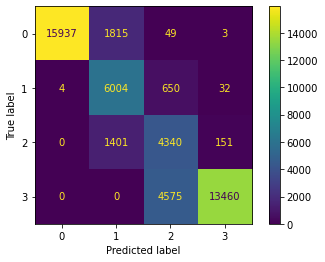

Accuracy: 0.8207389355857996


In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(gnb,X_test, y_test) 
plt.show()
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
### End of Naive Bayes algorithm

Accuracy: 0.9901902067284856


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


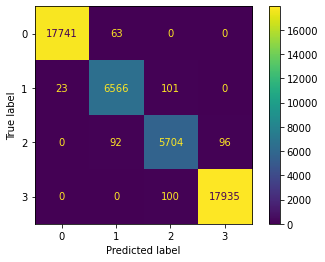

In [ ]:
# Random forest ensemble
from sklearn.ensemble import RandomForestClassifier
tree = RandomForestClassifier(n_estimators = 1000)
tree.fit(X_train, y_train)
predictions = tree.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, predictions))
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(tree,X_test, y_test) 
plt.show()
## End of regression tree


0.9863282460089631


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


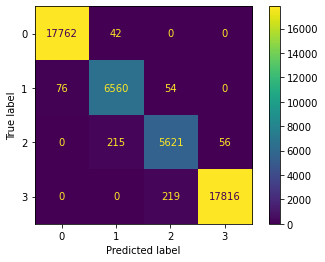

In [ ]:
### K-Nearest Neighbor

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=4)
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
  
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))
plot_confusion_matrix(knn,X_test, y_test) 
plt.show()

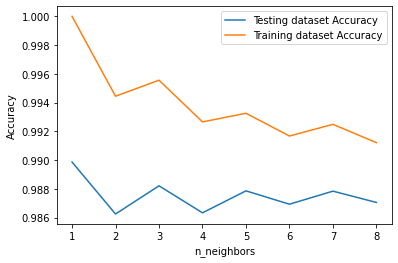

In [ ]:
import matplotlib.pyplot as plt
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)

plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
  
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

Year  Grade 2013 2014 2015
0         1    8    5   46
1         3    0   33   14
2         4   15   19    2
3         5    8   10    0
4         6    0   16   15


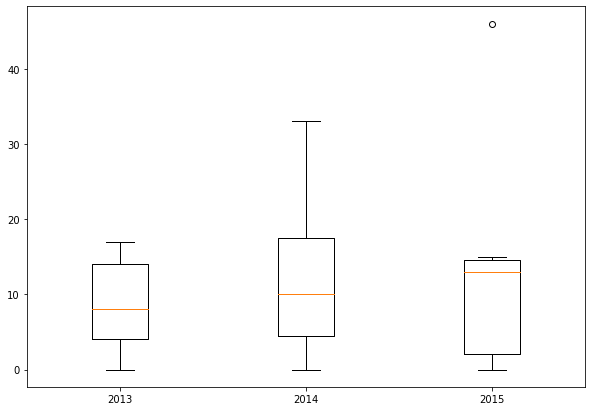

In [ ]:
### RUN just after running the 6th celll othewise ERRRORRRR!!!!
import matplotlib.pyplot as plt
import numpy as np

year_wise = X_test.pivot_table(index=['Grade'], columns='Year',
                     values='avg', aggfunc='first').reset_index()
 
fig = plt.figure(figsize =(10, 7))
ax  = fig.add_subplot(111)
year_wise[2013]=year_wise[2013].astype(float)
year_wise[2014]=year_wise[2014].astype(float)
year_wise[2015]=year_wise[2015].astype(float)
bp = ax.boxplot([year_wise[2013],year_wise[2014],year_wise[2015]])
plt.xticks([1, 2,3], ["2013", "2014","2015"])
# show plot
plt.show()